In [56]:
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from joblib import Parallel, delayed
from scipy.sparse import vstack
from scipy.stats import chi2_contingency
import scipy.stats as stats


In [2]:
data = pd.read_csv('setp_final_dataset.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_1348\1974299966.py:1: DtypeWarning: Columns (26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,93,94,96,97,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,119,120,121,122,123,124,125,126,128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('setp_final_dataset.csv')


In [3]:
data.shape

(19466, 231)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     # Show all rows

In [5]:
def check_null_values(df, column_name):
    total_values = df[column_name].shape[0]  # Total number of rows in the DataFrame
    missing_count = df[column_name].isnull().sum()  # Count of missing values
    missing_percentage = (missing_count / total_values) * 100  # Percentage of missing values
    
    return f"Null count: {int(missing_count)}", f"Null percentage: {float(round(missing_percentage, 2))}%"

In [6]:
data.head()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars,Rating_count_numeric,Price_num,MRP_Price_num,5_star,4_star,3_star,2_star,1_star,Dupatta,Top Hemline,Blouse Fabric,Dupatta Pattern,Choli Stitch,Top Type,Pattern Coverage,Arch Type,Stretch,Type of Pleat,Closure,Top Design Styling,Front Styling,Sport,Knit or Woven,Weave Type,Lehenga Fabric,Bottom Type,Hemline,Fabric 3,Sleeve Length,Surface Styling,Shoe Width,Collar,Top Pattern,Main Trend,Technique,Lehenga Stitch,Top Shape,Waist Rise,Package Contains,Type of Distress,Character,Multipack Set,Shape,Outsole Type,Type,Fastening and Back Detail,Dupatta Border,Distance,Brand Fit Name,Sustainable,Placket Length,Lining,Number of Pockets,Shade,Technology,Cleats,Lehenga Lining Fabric,Fabric Type,Pronation for Running Shoes,Sleeve Styling,Neck,Cuff,Waistband,Occasion,Contact Brand or Retailer for pre-sales product queries,Colour Family,Lining Fabric,Slit Detail,Fade,Add-Ons,Players,Warranty,Material,Hood,Reversible,Care for me,Pocket Type,Print or Pattern Type,Toe Shape,Insole,Fit,Wash Care,Length,Ornamentation,Blouse Closure,Transparency,Cushioning,Bottom Closure,Top Length,Lehenga Closure,Vents,Fastening,Design Styling,Features,Fabric 2,Effects,Distress,Fly Type,Micro Trend,Sport Team,Number of Items,Surface Type,Weave Pattern,Ankle Height,Placket,Running Type,Fabric,Sole Material,Bottom Pattern,Pattern,Dupatta Fabric,Stitch,Extracted_Colors,acrylic pullover,anarkali kurta,blouse with,blouse with dupatta,breasted blazer,breasted formal,cable knit,casual blazer,collar pure,collar pure cotton,collar shirt,cotton formal,cotton formal shirt,cotton kurta,cotton kurta with,cotton shirt,cotton slim,cotton slim fit,cotton straight,cotton straight kurta,drop shoulder,embroidered regular,embroidered thread,embroidered thread work,ethnic motifs,ethnic motifs embroidered,ethnic motifs printed,fit formal,fit shirt,fit single,fit single breasted,floral embroidered,floral printed,formal blazer,formal shirt,gotta patti,kurta with,kurta with palazzos,kurta with trousers,lapel collar,lehenga blouse,lehenga blouse with,lehenga choli,lifestyle co,line kurta,long sleeves,mandarin collar,motifs embroidered,motifs printed,navy blue,notched lapel,polo collar,polo collar pure,polo collar shirt,printed kurta,printed pure,printed pure cotton,printed ready,printed ready to,printed regular,pullover sweater,pure cotton,pure cotton kurta,pure cotton shirt,pure cotton slim,ready to,ready to wear,regular fit,round neck,self design,single breasted,single breasted blazer,single breasted formal,slim fit,slim fit shirt,slim fit single,straight kurta,straight kurta with,the lifestyle,the lifestyle co,thread work,thread work kurta,to wear,to wear lehenga,trousers dupatta,trousers with,trousers with dupatta,wear lehenga,wear lehenga blouse,wear lehenga choli,with dupatta,with palazzos,with trousers,with trousers dupatta,with trousers with,women ethnic,women ethnic motifs,work kurta,woven design,yoke design
0,1,Track Pants,23291736.0,Bonkers Corner,women-clothing,Women Black Mid-Rise Wide Leg Track Pants,4.5,3.3kRatings,₹1039,MRP₹1599,(35% OFF),"['XS', 'S', 'M', 'L', 'XL', 'XXL']",Black solid wide-leg mid-rise 320 GSM track pa...,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Fabric': 'Cotton', 'Fit': 'Relaxed Fit', 'Fa...","{'5': '2422', '4': '522', '3': '153', '2': '65...",3300.0,1039.0,1599.0,2422.0,522.0,153.0,65.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawstring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Relaxed Fit,Machine Wash,Regular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
# List of columns to train model
featured_columns = ['Product_id', 'Fashion_type', 'Brand_Name', 'category', 'Rating', 'Rating_count_numeric', '5_star', '4_star', '3_star', '2_star', '1_star', 'Occasion', 'Length', 'Wash Care', 'Fit', 'image_ref', 'file_path', 'image_url', 'Fabric', 'Fabric 3', 'Blouse Fabric', 'Fabric 2', 'Fabric Type', 'Lehenga Fabric', 'Lining Fabric', 'Lehenga Lining Fabric', 'Dupatta Fabric']

model_data = data[featured_columns]

# Display the new DataFrame
model_data.head()

,Product_id,Fashion_type,Brand_Name,category,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Fabric,Fabric 3,Blouse Fabric,Fabric 2,Fabric Type,Lehenga Fabric,Lining Fabric,Lehenga Lining Fabric,Dupatta Fabric
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,4.5,3300.0,2422.0,522.0,153.0,65.0,140.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,Polyester,NaN,NaN,NaN,NaN,NaN
1,13501940.0,Track Pants,Puma,men-clothing,4.0,2800.0,1526.0,563.0,264.0,122.0,368.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Polyester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30193817.0,Track Pants,Puma,men-clothing,4.4,242.0,168.0,40.0,11.0,5.0,18.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19222946.0,Track Pants,Nike,men-clothing,4.2,1200.0,772.0,232.0,73.0,40.0,115.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Polyester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30491022.0,Track Pants,Puma,men-clothing,4.2,46.0,30.0,7.0,2.0,1.0,6.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,Nylon,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check how many missing values are in the 'Fabric' column
missing_fabric_count = model_data['Fabric'].isnull().sum()

# Display the number of missing values in the 'Fabric' column
print(f"Number of missing values in 'Fabric': {missing_fabric_count}")

# Rows where 'Fabric' is missing
missing_fabric_rows = model_data[model_data['Fabric'].isnull()]
missing_fabric_rows.head(10)  # Display the first 10 rows with missing 'Fabric'

Number of missing values in 'Fabric': 13639


,Product_id,Fashion_type,Brand_Name,category,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Fabric,Fabric 3,Blouse Fabric,Fabric 2,Fabric Type,Lehenga Fabric,Lining Fabric,Lehenga Lining Fabric,Dupatta Fabric
1050,24567752.0,Women Office Wear,CHIC BY TOKYO TALKIES,women-clothing,4.1,3900.0,2103.0,877.0,371.0,168.0,354.0,NaN,Regular,NaN,Straight Fit,Women Office Wear_women-clothing_24567752.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1051,29793346.0,Women Office Wear,FITHUB,women-clothing,4.3,2900.0,1911.0,521.0,178.0,80.0,206.0,NaN,Regular,NaN,NaN,Women Office Wear_women-clothing_29793346.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,23960226.0,Women Office Wear,Chemistry,women-clothing,4.4,1400.0,879.0,290.0,100.0,30.0,58.0,Formal,Regular,NaN,Regular Fit,Women Office Wear_women-clothing_23960226.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,27985712.0,Women Office Wear,FITHUB,women-clothing,4.3,2900.0,1912.0,521.0,179.0,80.0,206.0,NaN,Regular,NaN,NaN,Women Office Wear_women-clothing_27985712.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,Cotton,NaN,NaN,NaN,NaN
1054,30660808.0,Women Office Wear,FNOCKS,women-clothing,3.2,49.0,17.0,10.0,2.0,4.0,16.0,Formal,Regular,NaN,Regular Fit,Women Office Wear_women-clothing_30660808.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1055,24567744.0,Women Office Wear,CHIC BY TOKYO TALKIES,women-clothing,4.0,3300.0,1734.0,638.0,323.0,148.0,407.0,NaN,Cropped,NaN,Slim Fit,Women Office Wear_women-clothing_24567744.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056,30044492.0,Women Office Wear,FNOCKS,women-clothing,3.6,433.0,206.0,62.0,36.0,36.0,93.0,Formal,Regular,NaN,Straight Fit,Women Office Wear_women-clothing_30044492.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,23367604.0,Women Office Wear,Next One,women-clothing,3.7,1500.0,748.0,228.0,151.0,91.0,312.0,NaN,Regular,NaN,Loose Fit,Women Office Wear_women-clothing_23367604.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,15697870.0,Women Office Wear,FableStreet,women-clothing,4.4,2300.0,1640.0,304.0,121.0,68.0,128.0,NaN,Regular,NaN,Flared,Women Office Wear_women-clothing_15697870.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,25120374.0,Women Office Wear,Chemistry,women-clothing,4.3,2200.0,1390.0,464.0,155.0,72.0,140.0,Formal,Regular,NaN,Regular Fit,Women Office Wear_women-clothing_25120374.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# List of columns to check for missing values in the specified order
fabric_duplicates = model_data[['Fabric 2', 'Fabric 3', 'Fabric Type', 'Blouse Fabric', 'Lehenga Fabric', 'Lining Fabric', 'Lehenga Lining Fabric', 'Dupatta Fabric']]

# Function to impute missing 'Fabric' values
def impute_fabric(row):
    # If 'Fabric' is missing, check other columns in the specified order
    if pd.isnull(row['Fabric']):
        for col in fabric_duplicates:
            if pd.notnull(row[col]):  # If a non-null value is found, use it for 'Fabric'
                return row[col]
    return row['Fabric']  # If 'Fabric' is not missing or no non-null value is found, return the original

# Apply the function to the DataFrame using .loc to avoid SettingWithCopyWarning
model_data.loc[:, 'Fabric'] = model_data.apply(impute_fabric, axis=1)

# Display the updated DataFrame
model_data.head(10)

,Product_id,Fashion_type,Brand_Name,category,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Fabric,Fabric 3,Blouse Fabric,Fabric 2,Fabric Type,Lehenga Fabric,Lining Fabric,Lehenga Lining Fabric,Dupatta Fabric
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,4.5,3300.0,2422.0,522.0,153.0,65.0,140.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,Polyester,NaN,NaN,NaN,NaN,NaN
1,13501940.0,Track Pants,Puma,men-clothing,4.0,2800.0,1526.0,563.0,264.0,122.0,368.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Polyester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30193817.0,Track Pants,Puma,men-clothing,4.4,242.0,168.0,40.0,11.0,5.0,18.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19222946.0,Track Pants,Nike,men-clothing,4.2,1200.0,772.0,232.0,73.0,40.0,115.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Polyester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30491022.0,Track Pants,Puma,men-clothing,4.2,46.0,30.0,7.0,2.0,1.0,6.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,Nylon,NaN,NaN,NaN,NaN,NaN
5,24014950.0,Track Pants,Nike,men-clothing,4.5,140.0,102.0,23.0,5.0,3.0,7.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_24014950.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Fleece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19444600.0,Track Pants,HRX by Hrithik Roshan,men-clothing,3.8,9600.0,4679.0,1841.0,1016.0,552.0,1528.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19444600.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23291732.0,Track Pants,Bonkers Corner,women-clothing,4.0,597.0,353.0,89.0,49.0,24.0,82.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291732.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,Polyester,NaN,NaN,NaN,NaN,NaN
8,27857030.0,Track Pants,Styli,women-clothing,3.5,144.0,62.0,19.0,19.0,12.0,32.0,Casual,Regular,Machine Wash,Slim Fit,Track Pants_women-clothing_27857030.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30490629.0,Track Pants,Puma,women-clothing,4.4,31.0,21.0,5.0,2.0,1.0,2.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_30490629.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check how many missing values are in the 'Fabric' column
missing_fabric_count_after= model_data['Fabric'].isnull().sum()

# Display the number of missing values in the 'Fabric' column
print(f"Number of missing values in 'Fabric': {missing_fabric_count_after}")

# Rows where 'Fabric' is missing
missing_fabric_rows = model_data[model_data['Fabric'].isnull()]
missing_fabric_rows.head(10)  # Display the first 10 rows with missing 'Fabric'

Number of missing values in 'Fabric': 12652


,Product_id,Fashion_type,Brand_Name,category,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Fabric,Fabric 3,Blouse Fabric,Fabric 2,Fabric Type,Lehenga Fabric,Lining Fabric,Lehenga Lining Fabric,Dupatta Fabric
1050,24567752.0,Women Office Wear,CHIC BY TOKYO TALKIES,women-clothing,4.1,3900.0,2103.0,877.0,371.0,168.0,354.0,NaN,Regular,NaN,Straight Fit,Women Office Wear_women-clothing_24567752.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1051,29793346.0,Women Office Wear,FITHUB,women-clothing,4.3,2900.0,1911.0,521.0,178.0,80.0,206.0,NaN,Regular,NaN,NaN,Women Office Wear_women-clothing_29793346.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,23960226.0,Women Office Wear,Chemistry,women-clothing,4.4,1400.0,879.0,290.0,100.0,30.0,58.0,Formal,Regular,NaN,Regular Fit,Women Office Wear_women-clothing_23960226.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,30660808.0,Women Office Wear,FNOCKS,women-clothing,3.2,49.0,17.0,10.0,2.0,4.0,16.0,Formal,Regular,NaN,Regular Fit,Women Office Wear_women-clothing_30660808.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1055,24567744.0,Women Office Wear,CHIC BY TOKYO TALKIES,women-clothing,4.0,3300.0,1734.0,638.0,323.0,148.0,407.0,NaN,Cropped,NaN,Slim Fit,Women Office Wear_women-clothing_24567744.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056,30044492.0,Women Office Wear,FNOCKS,women-clothing,3.6,433.0,206.0,62.0,36.0,36.0,93.0,Formal,Regular,NaN,Straight Fit,Women Office Wear_women-clothing_30044492.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,23367604.0,Women Office Wear,Next One,women-clothing,3.7,1500.0,748.0,228.0,151.0,91.0,312.0,NaN,Regular,NaN,Loose Fit,Women Office Wear_women-clothing_23367604.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,15697870.0,Women Office Wear,FableStreet,women-clothing,4.4,2300.0,1640.0,304.0,121.0,68.0,128.0,NaN,Regular,NaN,Flared,Women Office Wear_women-clothing_15697870.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,25120374.0,Women Office Wear,Chemistry,women-clothing,4.3,2200.0,1390.0,464.0,155.0,72.0,140.0,Formal,Regular,NaN,Regular Fit,Women Office Wear_women-clothing_25120374.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,26293290.0,Women Office Wear,Van Heusen Woman,women-clothing,4.4,153.0,105.0,26.0,6.0,6.0,10.0,NaN,Cropped,NaN,Regular Fit,Women Office Wear_women-clothing_26293290.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display the number of missing values imputed in the 'Fabric' column
print(f"Number of missing values imputed in 'Fabric': {missing_fabric_count-missing_fabric_count_after}")

Number of missing values imputed in 'Fabric': 987


In [12]:
# Calculate the percentage of missing values in the 'Fabric' column
null_percentage_fabric = model_data['Fabric'].isnull().mean() * 100

# Display the percentage of missing values
print(f"Percentage of missing values in 'Fabric': {null_percentage_fabric:.2f}%")

Percentage of missing values in 'Fabric': 65.00%


In [13]:
model_data.shape

(19466, 27)

In [14]:
# Rearrange columns to move 'Fabric' after 'category'
columns = model_data.columns.tolist()

# Move 'Fabric' to after 'category'
columns.remove('Fabric')
columns.insert(columns.index('category') + 1, 'Fabric')

# Reorder the DataFrame columns
model_data = model_data[columns]
model_data.head()

,Product_id,Fashion_type,Brand_Name,category,Fabric,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Fabric 3,Blouse Fabric,Fabric 2,Fabric Type,Lehenga Fabric,Lining Fabric,Lehenga Lining Fabric,Dupatta Fabric
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,4.5,3300.0,2422.0,522.0,153.0,65.0,140.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,Polyester,NaN,NaN,NaN,NaN,NaN
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,4.0,2800.0,1526.0,563.0,264.0,122.0,368.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,4.4,242.0,168.0,40.0,11.0,5.0,18.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,4.2,1200.0,772.0,232.0,73.0,40.0,115.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,4.2,46.0,30.0,7.0,2.0,1.0,6.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",NaN,NaN,Nylon,NaN,NaN,NaN,NaN,NaN


In [15]:
# Impute missing values in the 'Fabric' column as 'unknown'
model_data['Fabric'] = model_data['Fabric'].fillna('unknown')

In [16]:
check_null_values(model_data, 'Fabric')

('Null count: 0', 'Null percentage: 0.0%')

In [17]:
# Drop the specified columns from the DataFrame
model_data.drop(columns=fabric_duplicates, inplace=True)

# Display the updated DataFrame to confirm the columns were dropped
model_data.head(10)

,Product_id,Fashion_type,Brand_Name,category,Fabric,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,4.5,3300.0,2422.0,522.0,153.0,65.0,140.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,4.0,2800.0,1526.0,563.0,264.0,122.0,368.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,4.4,242.0,168.0,40.0,11.0,5.0,18.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,4.2,1200.0,772.0,232.0,73.0,40.0,115.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,4.2,46.0,30.0,7.0,2.0,1.0,6.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
5,24014950.0,Track Pants,Nike,men-clothing,Fleece,4.5,140.0,102.0,23.0,5.0,3.0,7.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_24014950.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
6,19444600.0,Track Pants,HRX by Hrithik Roshan,men-clothing,Cotton,3.8,9600.0,4679.0,1841.0,1016.0,552.0,1528.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19444600.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
7,23291732.0,Track Pants,Bonkers Corner,women-clothing,Cotton,4.0,597.0,353.0,89.0,49.0,24.0,82.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291732.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
8,27857030.0,Track Pants,Styli,women-clothing,Cotton,3.5,144.0,62.0,19.0,19.0,12.0,32.0,Casual,Regular,Machine Wash,Slim Fit,Track Pants_women-clothing_27857030.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
9,30490629.0,Track Pants,Puma,women-clothing,Cotton,4.4,31.0,21.0,5.0,2.0,1.0,2.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_30490629.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


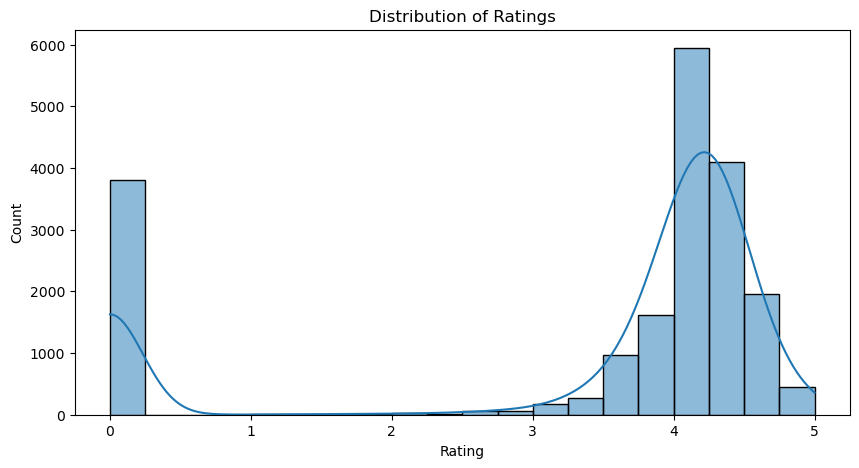

In [18]:
# Visualize the distribution of Rating
plt.figure(figsize=(10, 5))
sns.histplot(model_data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

Quantile Calculation: 

>Rating Thresholds: Calculate the 33rd percentile and 66th percentile of the Rating column.
>Count Thresholds: Calculate the 33rd percentile and 66th percentile of the Rating_count_numeric column.

>High: If the product's rating is above the 66th percentile and its rating count is also above the 66th percentile.
>Medium: If the product's rating is above the 33rd percentile and its rating count is above the 33rd percentile but below the 66th percentile.
>Low: Any product that doesn't meet the criteria for high or medium popularity.

>Using quantiles helps create a fair distribution of popularity categories that reflects the actual data, reducing bias.
>The thresholds automatically adjust based on the characteristics of the dataset, ensuring that the classification is relevant to the data.

In [19]:
# Calculate quantiles for Rating and Rating Count
rating_thresholds = model_data['Rating'].quantile([0.33, 0.66]).values
count_thresholds = model_data['Rating_count_numeric'].quantile([0.33, 0.66]).values

# Define a function to categorize popularity based on quantiles
def categorize_popularity(row):
    rating = row['Rating']
    count = row['Rating_count_numeric']

    if rating >= rating_thresholds[1] and count >= count_thresholds[1]:  # High
        return 'high'
    elif rating >= rating_thresholds[0] and count >= count_thresholds[0]:  # Medium
        return 'medium'
    else:  # Low
        return 'low'

# Apply the function to create the 'Popularity' column
model_data['Popularity'] = model_data.apply(categorize_popularity, axis=1)
model_data.head(10)

,Product_id,Fashion_type,Brand_Name,category,Fabric,Rating,Rating_count_numeric,5_star,4_star,3_star,2_star,1_star,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Popularity
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,4.5,3300.0,2422.0,522.0,153.0,65.0,140.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",high
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,4.0,2800.0,1526.0,563.0,264.0,122.0,368.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,4.4,242.0,168.0,40.0,11.0,5.0,18.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",high
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,4.2,1200.0,772.0,232.0,73.0,40.0,115.0,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",high
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,4.2,46.0,30.0,7.0,2.0,1.0,6.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
5,24014950.0,Track Pants,Nike,men-clothing,Fleece,4.5,140.0,102.0,23.0,5.0,3.0,7.0,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_24014950.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
6,19444600.0,Track Pants,HRX by Hrithik Roshan,men-clothing,Cotton,3.8,9600.0,4679.0,1841.0,1016.0,552.0,1528.0,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19444600.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",low
7,23291732.0,Track Pants,Bonkers Corner,women-clothing,Cotton,4.0,597.0,353.0,89.0,49.0,24.0,82.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291732.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
8,27857030.0,Track Pants,Styli,women-clothing,Cotton,3.5,144.0,62.0,19.0,19.0,12.0,32.0,Casual,Regular,Machine Wash,Slim Fit,Track Pants_women-clothing_27857030.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",low
9,30490629.0,Track Pants,Puma,women-clothing,Cotton,4.4,31.0,21.0,5.0,2.0,1.0,2.0,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_30490629.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium


In [20]:
Rating_columns= model_data[['Rating', 'Rating_count_numeric', '5_star', '4_star', '3_star', '2_star', '1_star']]

# Drop the specified columns from the DataFrame
model_data.drop(columns=Rating_columns, inplace=True)

# Display the updated DataFrame to confirm the columns were dropped
model_data.head(10)

,Product_id,Fashion_type,Brand_Name,category,Fabric,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url,Popularity
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",high
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",high
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",high
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
5,24014950.0,Track Pants,Nike,men-clothing,Fleece,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_24014950.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
6,19444600.0,Track Pants,HRX by Hrithik Roshan,men-clothing,Cotton,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19444600.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",low
7,23291732.0,Track Pants,Bonkers Corner,women-clothing,Cotton,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291732.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium
8,27857030.0,Track Pants,Styli,women-clothing,Cotton,Casual,Regular,Machine Wash,Slim Fit,Track Pants_women-clothing_27857030.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",low
9,30490629.0,Track Pants,Puma,women-clothing,Cotton,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_30490629.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540...",medium


In [21]:
# Rearrange columns to move 'Fabric' after 'category'
columns = model_data.columns.tolist()

# Move 'Fabric' to after 'category'
columns.remove('Popularity')
columns.insert(columns.index('Fabric') + 1, 'Popularity')

# Reorder the DataFrame columns
model_data = model_data[columns]
model_data.head()

,Product_id,Fashion_type,Brand_Name,category,Fabric,Popularity,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,high,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,medium,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,high,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,high,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,medium,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."


In [22]:
check_null_values(model_data, 'image_ref')

('Null count: 32', 'Null percentage: 0.16%')

In [23]:
missing_rows = model_data[model_data['image_ref'].isnull()]
display(missing_rows)

,Product_id,Fashion_type,Brand_Name,category,Fabric,Popularity,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url
1327,NaN,Women Office Wear,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,NaN,Women Office Wear,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,NaN,Women Office Wear,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3604,NaN,Shorts,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3605,NaN,Shorts,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606,NaN,Shorts,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3607,NaN,Shorts,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4608,NaN,Formal shoes,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4609,NaN,Formal shoes,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4610,NaN,Formal shoes,NaN,NaN,unknown,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
model_data = model_data.dropna(subset=['image_ref'])
model_data.shape

(19434, 13)

In [25]:
check_null_values(model_data, 'image_ref')

('Null count: 0', 'Null percentage: 0.0%')

In [26]:
check_null_values(model_data, 'Occasion')

('Null count: 5737', 'Null percentage: 29.52%')

In [27]:
model_data['Occasion'].unique()

array(['Casual', 'Sports', 'Maternity', nan, 'Formal', 'Party', 'Ethnic',
       'Work', 'Everyday', 'Smart Casual', 'Evening', 'Festive', 'Daily',
       'Fusion', 'Semiformal', 'Outdoor'], dtype=object)

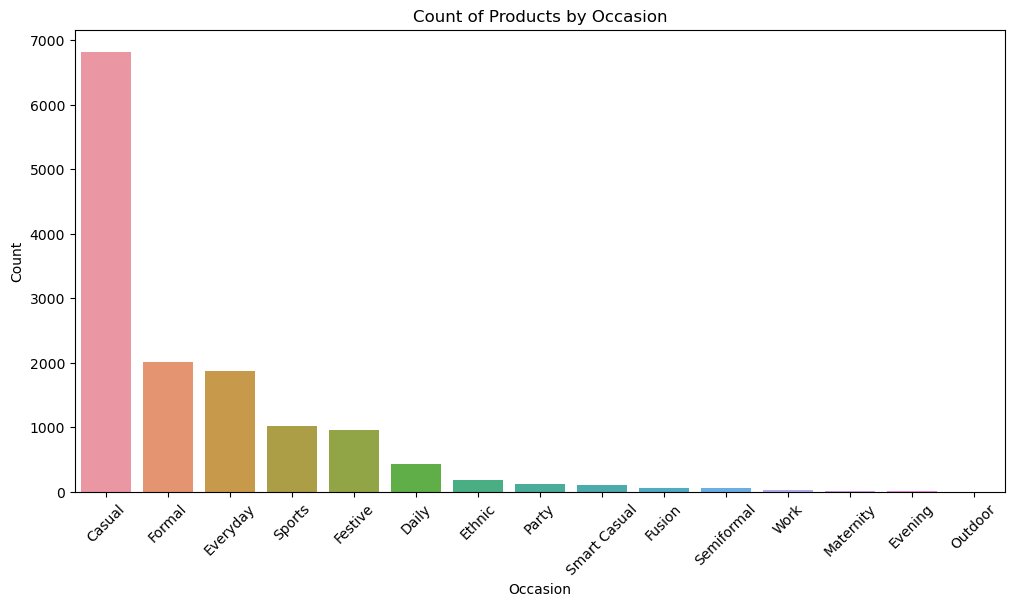

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=model_data, x='Occasion', order=model_data['Occasion'].value_counts().index)
plt.title('Count of Products by Occasion')
plt.xlabel('Occasion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Check if Occasion correlates with Fashion_type, category

>Degrees of Freedom (dof): The number of independent ways the contingency table values can vary.

>Expected Values (ex_fashion, ex_category): These are the counts we would expect if the variables were independent.

In [29]:
# Crosstab for Occasion and Fashion_type
occasion_fashion_crosstab = pd.crosstab(model_data['Occasion'], model_data['Fashion_type'])
display(occasion_fashion_crosstab)

Fashion_type,Ethnic wear,Flats,Formal Shirts,Jeans,Kurtas,Shorts,Sweatshirts,T-Shirt,Track Pants,Trousers,Women Office Wear,blazers,sneakers,suits,sweater
Occasion,,,,,,,,,,,,,,,
Casual,6,861,11,500,0,686,8,1649,590,415,0,430,0,5,1655
Daily,149,0,0,0,153,0,0,0,0,0,0,0,0,129,0
Ethnic,0,141,0,0,0,0,0,0,0,0,0,41,0,0,6
Evening,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0
Everyday,0,0,0,0,0,0,0,0,0,0,0,0,1872,0,0
Festive,300,0,0,0,206,0,0,0,0,0,0,0,0,459,0
Formal,0,0,630,0,0,0,0,0,0,83,845,446,0,10,1
Fusion,12,0,0,0,11,0,0,0,0,0,0,0,0,30,0
Maternity,0,0,0,0,4,0,0,0,5,1,0,0,0,0,0


In [30]:
# Crosstab for Occasion and category
occasion_category_crosstab = pd.crosstab(model_data['Occasion'], model_data['category'])
display(occasion_category_crosstab)

category,boys-clothing,boys-footwear,girls-clothing,girls-footwear,men-clothing,men-footwear,unisex-clothing,unisex-footwear,unisex-kids-clothing,unisex-kids-footwear,women-clothing,women-footwear
Occasion,,,,,,,,,,,,
Casual,231,0,71,23,3088,2,19,0,24,0,2522,836
Daily,1,0,2,0,66,0,0,0,0,0,362,0
Ethnic,4,0,0,0,36,0,0,0,0,0,7,141
Evening,0,0,0,0,0,4,0,0,0,0,0,3
Everyday,0,39,0,19,0,1144,0,180,0,42,0,448
Festive,28,0,18,0,187,0,0,0,0,0,732,0
Formal,4,0,0,0,809,0,0,0,0,0,1202,0
Fusion,0,0,4,0,1,0,0,0,0,0,48,0
Maternity,0,0,0,0,0,0,0,0,0,0,10,0


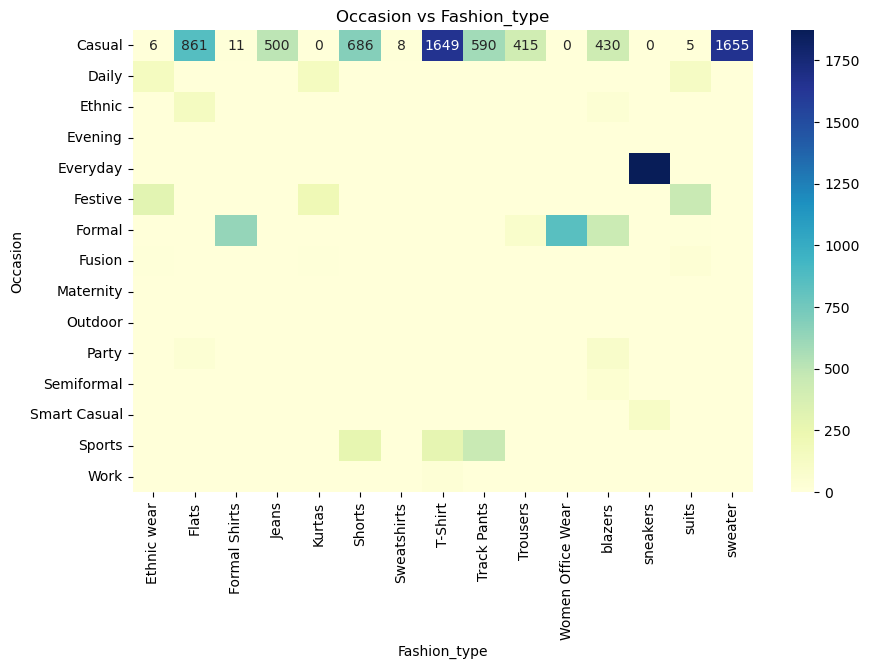

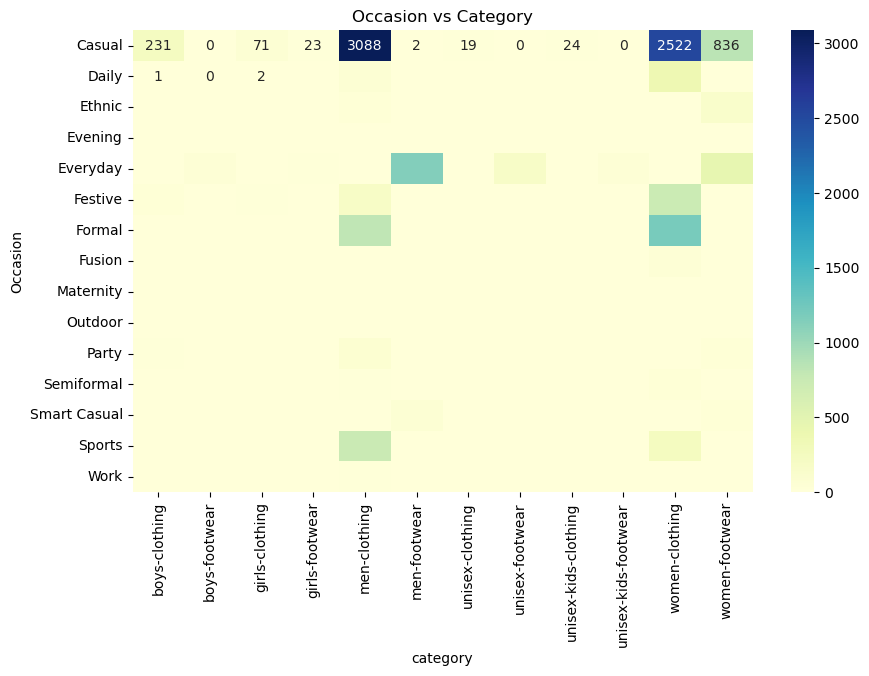

In [31]:
# Heatmap for Occasion and Fashion_type
plt.figure(figsize=(10, 6))
sns.heatmap(occasion_fashion_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Occasion vs Fashion_type')
plt.show()

# Heatmap for Occasion and category
plt.figure(figsize=(10, 6))
sns.heatmap(occasion_category_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Occasion vs Category')
plt.show()

In [32]:
# Perform Chi-Square Test for Occasion and Fashion_type
chi2_fashion, p_fashion, dof_fashion, ex_fashion = chi2_contingency(occasion_fashion_crosstab)
print(f"Chi-Square Test between Occasion and Fashion_type: p-value = {p_fashion}")

# Display the results
print(f"Chi-Square Test between Occasion and Fashion_type: p-value = {p_fashion}")

# Interpretation
if p_fashion < 0.05:
    print("There is a significant relationship between Occasion and Fashion_type.")
else:
    print("No significant relationship between Occasion and Fashion_type.")

Chi-Square Test between Occasion and Fashion_type: p-value = 0.0
Chi-Square Test between Occasion and Fashion_type: p-value = 0.0
There is a significant relationship between Occasion and Fashion_type.


In [33]:
# Perform Chi-Square Test for Occasion and category
chi2_category, p_category, dof_category, ex_category = chi2_contingency(occasion_category_crosstab)
print(f"Chi-Square Test between Occasion and category: p-value = {p_category}")


# Display the results
print(f"Chi-Square Test between Occasion and category: p-value = {p_category}")

# Interpretation

if p_category < 0.05:
    print("There is a significant relationship between Occasion and Category.")
else:
    print("No significant relationship between Occasion and Category.")

Chi-Square Test between Occasion and category: p-value = 0.0
Chi-Square Test between Occasion and category: p-value = 0.0
There is a significant relationship between Occasion and Category.


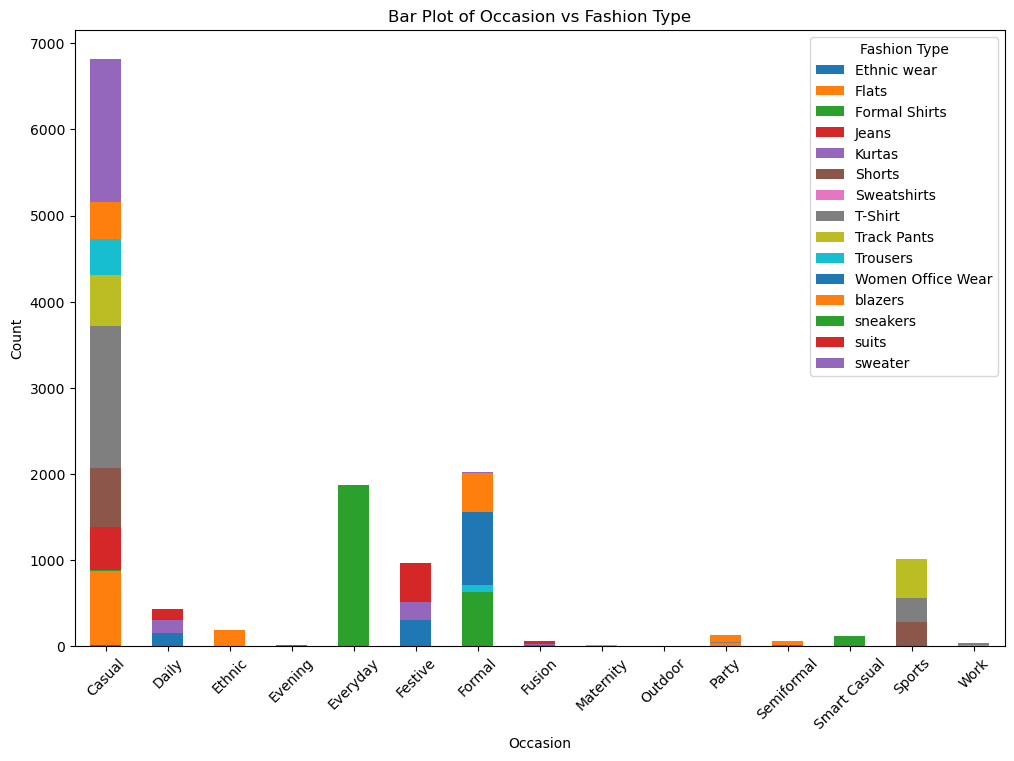

In [34]:
occasion_fashion_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Bar Plot of Occasion vs Fashion Type')
plt.xlabel('Occasion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fashion Type')
plt.show()

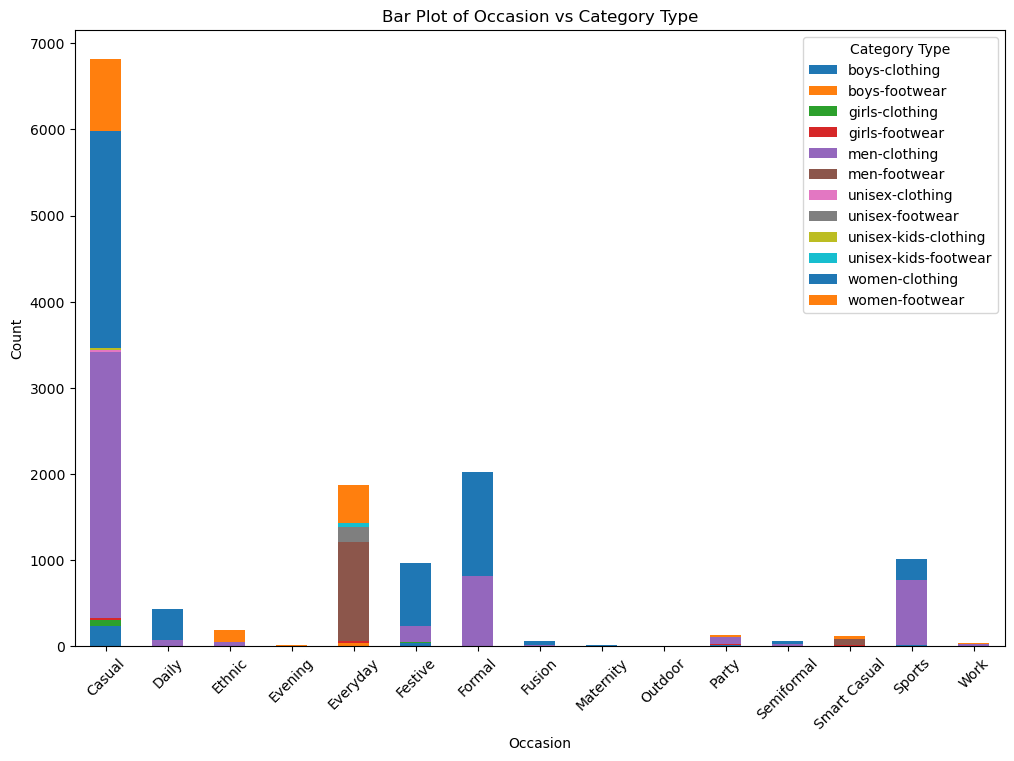

In [35]:

occasion_category_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Bar Plot of Occasion vs Category Type')
plt.xlabel('Occasion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category Type')
plt.show()

Since there's a strong relationship between Occasion and Fashion_type or category, impute missing values for Occasion with most common combination of Fashion_type for each occasion.

In [36]:
def fill_missing_occasion(df):
    def fill_with_mode(group):
        mode_value = group.mode()  # Get the mode of the group
        if not mode_value.empty:
            return group.fillna(mode_value[0])  # Fill missing values with mode
        else:
            return group.fillna('unknown')  # If no mode is found, fill with 'unknown'

    # Fill missing values based on 'Fashion_type'
    df['Occasion'] = df.groupby('Fashion_type')['Occasion'].transform(fill_with_mode)

    # Fill any remaining NaN values based on 'category'
    df['Occasion'] = df.groupby('category')['Occasion'].transform(fill_with_mode)

    return df

In [37]:
# Apply the combined function
model_data = fill_missing_occasion(model_data)

In [38]:
check_null_values(model_data, 'Occasion')

('Null count: 0', 'Null percentage: 0.0%')

In [39]:
model_data.shape

(19434, 13)

In [40]:
model_data.head(10)

,Product_id,Fashion_type,Brand_Name,category,Fabric,Popularity,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,high,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,medium,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,high,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,high,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,medium,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
5,24014950.0,Track Pants,Nike,men-clothing,Fleece,medium,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_24014950.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
6,19444600.0,Track Pants,HRX by Hrithik Roshan,men-clothing,Cotton,low,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19444600.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
7,23291732.0,Track Pants,Bonkers Corner,women-clothing,Cotton,medium,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291732.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
8,27857030.0,Track Pants,Styli,women-clothing,Cotton,low,Casual,Regular,Machine Wash,Slim Fit,Track Pants_women-clothing_27857030.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
9,30490629.0,Track Pants,Puma,women-clothing,Cotton,medium,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_30490629.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."


In [41]:
check_null_values(model_data, 'Length')

('Null count: 9875', 'Null percentage: 50.81%')

In [42]:
model_data['Length'].unique()

array(['Regular', 'Three-Fourth Length', 'Cropped', 'Knee Length', 'Midi',
       'Above Knee', nan, 'Longline', 'Mini', 'Crop', 'Maxi',
       'Below Knee', 'Calf Length', 'Ankle Length'], dtype=object)

Hence it has 50% missing values, and for the length feature, it's not a ideal to impute a specific value. so we can impute unknown or can drop the feature because it's not that important for the model.

In [43]:
# Impute missing values in the 'Wash Care' column as 'unknown'
model_data['Length'] = model_data['Length'].fillna('unknown')

In [44]:
check_null_values(data, 'Wash Care')

('Null count: 13941', 'Null percentage: 71.62%')

In [45]:
data['Wash Care'].unique()

array(['Machine Wash', 'Hand Wash', 'Dry Clean', nan], dtype=object)

In [46]:
# Impute missing values in the 'Wash Care' column as 'unknown'
model_data['Wash Care'] = model_data['Wash Care'].fillna('unknown')

In [47]:
check_null_values(data, 'Fit')

('Null count: 12106', 'Null percentage: 62.19%')

In [48]:
data['Fit'].unique()

array(['Relaxed Fit', 'Slim Fit', 'Regular Fit', 'Bootcut',
       'Straight Fit', 'Flared', nan, 'Loose Fit', 'Tapered Fit',
       'Skinny Fit', 'Tailored Fit', 'Oversized', 'Mom Fit', 'Wide Leg',
       'Jogger', 'Boyfriend Fit', 'Super Skinny Fit', 'Dad Fit',
       'Comfort Fit', 'Super Slim Fit', 'Compression', 'Boxy'],
      dtype=object)

In [49]:
# Impute missing values in the Fit column as 'unknown'
model_data['Fit'] = model_data['Fit'].fillna('unknown')

In [50]:
model_data.head(10)

,Product_id,Fashion_type,Brand_Name,category,Fabric,Popularity,Occasion,Length,Wash Care,Fit,image_ref,file_path,image_url
0,23291736.0,Track Pants,Bonkers Corner,women-clothing,Cotton,high,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291736.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
1,13501940.0,Track Pants,Puma,men-clothing,Polyester,medium,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_13501940.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
2,30193817.0,Track Pants,Puma,men-clothing,Cotton,high,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30193817.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
3,19222946.0,Track Pants,Nike,men-clothing,Polyester,high,Sports,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19222946.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
4,30491022.0,Track Pants,Puma,men-clothing,Cotton,medium,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_30491022.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
5,24014950.0,Track Pants,Nike,men-clothing,Fleece,medium,Sports,Regular,Machine Wash,Slim Fit,Track Pants_men-clothing_24014950.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
6,19444600.0,Track Pants,HRX by Hrithik Roshan,men-clothing,Cotton,low,Casual,Regular,Machine Wash,Regular Fit,Track Pants_men-clothing_19444600.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
7,23291732.0,Track Pants,Bonkers Corner,women-clothing,Cotton,medium,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_23291732.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
8,27857030.0,Track Pants,Styli,women-clothing,Cotton,low,Casual,Regular,Machine Wash,Slim Fit,Track Pants_women-clothing_27857030.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."
9,30490629.0,Track Pants,Puma,women-clothing,Cotton,medium,Casual,Regular,Machine Wash,Relaxed Fit,Track Pants_women-clothing_30490629.jpg,C:/Users/DELL/Downloads/Trendix/Final Dataset/...,"https://assets.myntassets.com/h_720,q_90,w_540..."


In [51]:
print("DataFrame Info:")
model_data.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 19434 entries, 0 to 19465
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    19434 non-null  float64
 1   Fashion_type  19434 non-null  object 
 2   Brand_Name    19434 non-null  object 
 3   category      19434 non-null  object 
 4   Fabric        19434 non-null  object 
 5   Popularity    19434 non-null  object 
 6   Occasion      19434 non-null  object 
 7   Length        19434 non-null  object 
 8   Wash Care     19434 non-null  object 
 9   Fit           19434 non-null  object 
 10  image_ref     19434 non-null  object 
 11  file_path     19434 non-null  object 
 12  image_url     19434 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.1+ MB


In [52]:
# Count of unique values in each column
print("\nUnique Values Count:")
print(model_data.nunique())


Unique Values Count:
Product_id      18451
Fashion_type       17
Brand_Name        986
category           12
Fabric             46
Popularity          3
Occasion           16
Length             14
Wash Care           4
Fit                22
image_ref       19216
file_path       19216
image_url       18451
dtype: int64


In [53]:
# Check for null values and their percentage in each column
null_count = model_data.isnull().sum()  # Count of null values
total_count = model_data.shape[0]  # Total number of rows
null_percentage = (null_count / total_count) * 100  # Percentage of null values

# Create a DataFrame to display the results
null_info = pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

# Display the null information
print(null_info[null_info['Null Count'] > 0])  # Show only columns with null values

Empty DataFrame
Columns: [Null Count, Null Percentage]
Index: []


In [54]:
model_data.shape

(19434, 13)

In [55]:
model_data.to_csv('processed_dataset.csv', index=False)

In [57]:
# Step 1: Loading the Processed Dataset

data = pd.read_csv("processed_dataset.csv")

In [73]:
# Step 2: Feature Engineering
# Only using 'category' for matching, but also considering 'Occassion' and 'Fashion_type' for more refined recommendations

selected_features = ['Occasion', 'category', 'Brand_Name', 'Fashion_type']
onehot = OneHotEncoder()
onehot_features = onehot.fit_transform(data[selected_features]).toarray()

onehot_feature_names = onehot.get_feature_names_out(selected_features)
onehot_df = pd.DataFrame(onehot_features, columns=onehot_feature_names)
print("\nFeature-Engineered Data (One-Hot Encoded):\n")
display(onehot_df.head(10)) 


Feature-Engineered Data (One-Hot Encoded):



Occasion_Casual  Occasion_Daily  Occasion_Ethnic  Occasion_Evening  \
0              1.0             0.0              0.0               0.0   
1              0.0             0.0              0.0               0.0   
2              0.0             0.0              0.0               0.0   
3              0.0             0.0              0.0               0.0   
4              1.0             0.0              0.0               0.0   
5              0.0             0.0              0.0               0.0   
6              1.0             0.0              0.0               0.0   
7              1.0             0.0              0.0               0.0   
8              1.0             0.0              0.0               0.0   
9              1.0             0.0              0.0               0.0   

   Occasion_Everyday  Occasion_Festive  Occasion_Formal  Occasion_Fusion  \
0                0.0               0.0              0.0              0.0   
1                0.0               0.0              0.0              0.0   
2                0.0               0.0              0.0              0.0   
3                0.0               0.0              0.0              0.0   
4                0.0               0.0              0.0              0.0   
5                0.0               0.0              0.0              0.0   
6                0.0               0.0              0.0              0.0   
7                0.0               0.0              0.0              0.0   
8                0.0               0.0              0.0              0.0   
9                0.0               0.0              0.0              0.0   

   Occasion_Maternity  Occasion_Outdoor  Occasion_Party  Occasion_Semiformal  \
0                 0.0               0.0             0.0                  0.0   
1                 0.0               0.0             0.0                  0.0   
2                 0.0               0.0             0.0                  0.0   
3                 0.0               0.0             0.0                  0.0   
4                 0.0               0.0             0.0                  0.0   
5                 0.0               0.0             0.0                  0.0   
6                 0.0               0.0             0.0                  0.0   
7                 0.0               0.0             0.0                  0.0   
8                 0.0               0.0             0.0                  0.0   
9                 0.0               0.0             0.0                  0.0   

   Occasion_Smart Casual  Occasion_Sports  Occasion_Work  Occasion_unknown  \
0                    0.0              0.0            0.0               0.0   
1                    0.0              1.0            0.0               0.0   
2                    0.0              1.0            0.0               0.0   
3                    0.0              1.0            0.0               0.0   
4                    0.0              0.0            0.0               0.0   
5                    0.0              1.0            0.0               0.0   
6                    0.0              0.0            0.0               0.0   
7                    0.0              0.0            0.0               0.0   
8                    0.0              0.0            0.0               0.0   
9                    0.0              0.0            0.0               0.0   

   category_boys-clothing  category_boys-footwear  category_girls-clothing  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   
2                     0.0                     0.0                      0.0   
3                     0.0                     0.0                      0.0   
4                     0.0                     0.0                      0.0   
5                     0.0                     0.0                      0.0   
6                     0.0                     0.0                      0.0  

In [74]:
# Step 3: Normalizing the features to prevent bias due to feature scale

scaler = StandardScaler()
scaled_features = scaler.fit_transform(onehot_features)

scaled_df = pd.DataFrame(scaled_features, columns=onehot_feature_names)
print("\nNormalized Features:\n")
display(scaled_df.head(10))


Normalized Features:



Occasion_Casual  Occasion_Daily  Occasion_Ethnic  Occasion_Evening  \
0         1.341598       -0.150601        -0.098835         -0.018982   
1        -0.745380       -0.150601        -0.098835         -0.018982   
2        -0.745380       -0.150601        -0.098835         -0.018982   
3        -0.745380       -0.150601        -0.098835         -0.018982   
4         1.341598       -0.150601        -0.098835         -0.018982   
5        -0.745380       -0.150601        -0.098835         -0.018982   
6         1.341598       -0.150601        -0.098835         -0.018982   
7         1.341598       -0.150601        -0.098835         -0.018982   
8         1.341598       -0.150601        -0.098835         -0.018982   
9         1.341598       -0.150601        -0.098835         -0.018982   

   Occasion_Everyday  Occasion_Festive  Occasion_Formal  Occasion_Fusion  \
0           -0.32668         -0.511648        -0.354075        -0.052294   
1           -0.32668         -0.511648        -0.354075        -0.052294   
2           -0.32668         -0.511648        -0.354075        -0.052294   
3           -0.32668         -0.511648        -0.354075        -0.052294   
4           -0.32668         -0.511648        -0.354075        -0.052294   
5           -0.32668         -0.511648        -0.354075        -0.052294   
6           -0.32668         -0.511648        -0.354075        -0.052294   
7           -0.32668         -0.511648        -0.354075        -0.052294   
8           -0.32668         -0.511648        -0.354075        -0.052294   
9           -0.32668         -0.511648        -0.354075        -0.052294   

   Occasion_Maternity  Occasion_Outdoor  Occasion_Party  Occasion_Semiformal  \
0            -0.02269         -0.010145       -0.081745            -0.052294   
1            -0.02269         -0.010145       -0.081745            -0.052294   
2            -0.02269         -0.010145       -0.081745            -0.052294   
3            -0.02269         -0.010145       -0.081745            -0.052294   
4            -0.02269         -0.010145       -0.081745            -0.052294   
5            -0.02269         -0.010145       -0.081745            -0.052294   
6            -0.02269         -0.010145       -0.081745            -0.052294   
7            -0.02269         -0.010145       -0.081745            -0.052294   
8            -0.02269         -0.010145       -0.081745            -0.052294   
9            -0.02269         -0.010145       -0.081745            -0.052294   

   Occasion_Smart Casual  Occasion_Sports  Occasion_Work  Occasion_unknown  \
0              -0.076816        -0.234503      -0.038658         -0.374735   
1              -0.076816         4.264341      -0.038658         -0.374735   
2              -0.076816         4.264341      -0.038658         -0.374735   
3              -0.076816         4.264341      -0.038658         -0.374735   
4              -0.076816        -0.234503      -0.038658         -0.374735   
5              -0.076816         4.264341      -0.038658         -0.374735   
6              -0.076816        -0.234503      -0.038658         -0.374735   
7              -0.076816        -0.234503      -0.038658         -0.374735   
8              -0.076816        -0.234503      -0.038658         -0.374735   
9              -0.076816        -0.234503      -0.038658         -0.374735   

   category_boys-clothing  category_boys-footwear  category_girls-clothing  \
0               -0.130617               -0.052786                -0.185131   
1               -0.130617               -0.052786                -0.185131   
2               -0.130617               -0.052786                -0.185131   
3               -0.130617               -0.052786                -0.185131   
4               -0.130617               -0.052786                -0.185131   
5               -0.130617               -0.052786                -0.185131   
6               -0.130617               -0.052786                -0.185131  

In [75]:
# Step 4: Building KNN model using Euclidean distance

knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(scaled_features)

NearestNeighbors(metric='euclidean')

In [97]:
# Step 5: Recommendation Function based on 'Occasion'

def get_recommendations_by_occasion_type(occasion_type, data, knn_model, num_recommendations=5):
    
    # Filter the dataset to only include items with the given Occasion type
    
    filtered_data = data[data['Occasion'] == occasion_type]
    
    # Check if there are enough items for recommendations
    
    if len(filtered_data) < num_recommendations:
        print(f"Not enough items with the Occasion '{occasion_type}' for recommendations.")
        return filtered_data
    
    # Randomly select a subset of items from the filtered data to ensure different recommendations each time
    
    random_sample_size = min(100, len(filtered_data))
    random_sample = filtered_data.sample(n=random_sample_size, random_state=None)

    # Get the indices of the randomly sampled data relative to the original DataFrame
    
    random_indices = random_sample.index
    
    # Get the features corresponding to the randomly sampled data
    
    random_sample_features = scaled_features[random_indices, :]
    
    # Fit the KNN model only on the random sample (to get indices relative to the random sample)
    
    knn_model.fit(random_sample_features)
    
    # Select a random product from the random sample as the base product for recommendation
    
    random_base_index = np.random.choice(random_sample.index)
    
    # Get the feature vector of the selected base product
    
    base_product_feature = random_sample_features[random_sample.index.get_loc(random_base_index)].reshape(1, -1)
    
    # Find the nearest neighbors for the selected base product
    
    distances, relative_indices = knn_model.kneighbors(base_product_feature, n_neighbors=num_recommendations + 1)
    
    # Get the original indices corresponding to the relative indices in the random sample
    # Exclude the first item as it will be the base product itself
    
    original_indices = random_sample.index[relative_indices.flatten()[1:num_recommendations + 1]] # Ensure only top 'num_recommendations' are selected
    
    # Map indices back to product IDs and return the recommended products
    
    recommended_products = data.iloc[original_indices].head(num_recommendations)  # Ensure only the top recommendations are returned
    
    return recommended_products

# Step 6: Test the Recommendation System based on 'Occasion' type

# Replace 'Casual' with a valid Occasion type present in your dataset

occasion_type_input = 'Casual'
recommended_products_by_occasion = get_recommendations_by_occasion_type(occasion_type_input, data, knn, num_recommendations=5)

print(f"\nRecommended Products for Occasion: {occasion_type_input}\n")
display(recommended_products_by_occasion[['Product_id', 'category', 'Occasion', 'Fashion_type', 'Brand_Name', 'Popularity', 'Fit', 'Fabric', 'image_ref']])


Recommended Products for Occasion: Casual



,Product_id,category,Occasion,Fashion_type,Brand_Name,Popularity,Fit,Fabric,image_ref
6662,30175182.0,women-footwear,Casual,Flats,Mochi,medium,unknown,unknown,Flats_women-footwear_30175182.jpg
6838,21740078.0,women-footwear,Casual,Flats,Mochi,medium,unknown,unknown,Flats_women-footwear_21740078.jpg
6680,18308536.0,women-footwear,Casual,Flats,Mochi,low,unknown,unknown,Flats_women-footwear_18308536.jpg
17444,13622286.0,men-clothing,Casual,T-Shirt,Roadster,high,Regular Fit,Pure Cotton,T-Shirt_men-clothing_13622286.jpg
18345,16997836.0,men-clothing,Casual,T-Shirt,Roadster,high,Regular Fit,Cotton,T-Shirt_men-clothing_16997836.jpg


In [98]:
occasion_type_input = 'Formal'
recommended_products_by_occasion = get_recommendations_by_occasion_type(occasion_type_input, data, knn, num_recommendations=5)

print(f"\nRecommended Products for Occasion: {occasion_type_input}\n")
display(recommended_products_by_occasion[['Product_id', 'category', 'Occasion', 'Fashion_type', 'Brand_Name', 'Popularity', 'Fit', 'Fabric', 'image_ref']])


Recommended Products for Occasion: Formal



,Product_id,category,Occasion,Fashion_type,Brand_Name,Popularity,Fit,Fabric,image_ref
13207,23622374.0,men-clothing,Formal,blazers,Peter England Elite,low,Slim Fit,Linen,blazers_men-clothing_23622374.jpg
13936,19288552.0,men-clothing,Formal,blazers,Van Heusen,low,Slim Fit,Cotton Blend,blazers_men-clothing_19288552.jpg
13388,26569326.0,men-clothing,Formal,blazers,Van Heusen,low,Slim Fit,Polyviscose,blazers_men-clothing_26569326.jpg
13544,21549108.0,men-clothing,Formal,blazers,Arrow,medium,Slim Fit,Polyester,blazers_men-clothing_21549108.jpg
13376,26893596.0,men-clothing,Formal,blazers,Arrow,medium,Slim Fit,Polyester,blazers_men-clothing_26893596.jpg


In [101]:
occasion_type_input = 'Party'
recommended_products_by_occasion = get_recommendations_by_occasion_type(occasion_type_input, data, knn, num_recommendations=5)

print(f"\nRecommended Products for Occasion: {occasion_type_input}\n")
display(recommended_products_by_occasion[['Product_id', 'category', 'Occasion', 'Fashion_type', 'Brand_Name', 'Popularity', 'Fit', 'Fabric', 'image_ref']])


Recommended Products for Occasion: Party



,Product_id,category,Occasion,Fashion_type,Brand_Name,Popularity,Fit,Fabric,image_ref
13274,26375936.0,men-clothing,Party,blazers,Peter England,low,Slim Fit,Polyester,blazers_men-clothing_26375936.jpg
13399,27159782.0,men-clothing,Party,blazers,House of Pataudi,low,Tailored Fit,Polyester,blazers_men-clothing_27159782.jpg
13490,27159792.0,men-clothing,Party,blazers,House of Pataudi,low,Tailored Fit,Polyester,blazers_men-clothing_27159792.jpg
13288,27159752.0,men-clothing,Party,blazers,House of Pataudi,low,Tailored Fit,Polyester,blazers_men-clothing_27159752.jpg
13552,27159746.0,men-clothing,Party,blazers,House of Pataudi,low,Regular Fit,Polyester,blazers_men-clothing_27159746.jpg


In [102]:
occasion_type_input = 'Festive'
recommended_products_by_occasion = get_recommendations_by_occasion_type(occasion_type_input, data, knn, num_recommendations=5)

print(f"\nRecommended Products for Occasion: {occasion_type_input}\n")
display(recommended_products_by_occasion[['Product_id', 'category', 'Occasion', 'Fashion_type', 'Brand_Name', 'Popularity', 'Fit', 'Fabric', 'image_ref']])


Recommended Products for Occasion: Festive



,Product_id,category,Occasion,Fashion_type,Brand_Name,Popularity,Fit,Fabric,image_ref
14967,30472233.0,women-clothing,Festive,Kurtas,Anouk,high,unknown,unknown,Kurtas_women-clothing_30472233.jpg
14877,17593304.0,men-clothing,Festive,Kurtas,Anouk,high,unknown,unknown,Kurtas_men-clothing_17593304.jpg
15352,25001028.0,women-clothing,Festive,Kurtas,KALINI,medium,unknown,unknown,Kurtas_women-clothing_25001028.jpg
12698,30012098.0,women-clothing,Festive,Ethnic wear,Anouk,medium,unknown,unknown,Ethnic wear_women-clothing_30012098.jpg
12818,23610164.0,women-clothing,Festive,Ethnic wear,Anouk,high,unknown,unknown,Ethnic wear_women-clothing_23610164.jpg
